# Hands-on Practice for CLUS Module

### 0. Setting up necessary packages

Upgrade scikit-learn package.

In [45]:
!pip install --user scikit-learn --upgrade

Requirement already up-to-date: scikit-learn in c:\users\tauras\appdata\roaming\python\python37\site-packages (1.0.1)


Import necessary packages

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn import datasets

# importing clustering algorithms
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering

from sklearn.metrics import silhouette_samples

### 1. Generating and visualizing data

Create seven datasets using functions from the datasets package: 
1. **Blobs1**: three well separated clusters
2. **Blobs2**: three well separated clusters with high standard deviation
3. **Moons1**: two half-moon like separated clusters
4. **Moons2**: two half-moon like separated clusters with high standard deviation
5. **Circles1**: two concentric, but separated clusters
6. **Circles2**: two concentric, but separated clusters with high standard deviation
7. **Rand**: Random set of points

Total number of datapoints in each dataset: 1500. 

Number of attributes: 2


In [47]:
n_samples = 1500
random_state = 10

Blobs1_X, Blobs1_y = datasets.make_blobs(n_samples=n_samples,
                             random_state=random_state)
Blobs2_X, Blobs2_y = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[2.5, 2.5, 2.5],
                             random_state=random_state)
Moons1_X, Moons1_y = datasets.make_moons(n_samples=n_samples, noise=0.05,
                             random_state=random_state)
Moons2_X, Moons2_y = datasets.make_moons(n_samples=n_samples, noise=0.1,
                             random_state=random_state)
Circles1_X, Circles1_y = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05, random_state=random_state)
Circles2_X, Circles2_y = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=0.1, random_state=random_state)
Rand_X = np.random.rand(n_samples, 2);

Printing the dimensions of the Blobs1 data...

In [48]:
Blobs1_X.shape

(1500, 2)

Printing Blobs1 data...

In [49]:
Blobs1_X

array([[ 0.15042904, -5.5490135 ],
       [ 4.84805107,  5.4847015 ],
       [ 3.82847698,  5.6755923 ],
       ...,
       [ 2.80778483,  5.72054107],
       [ 1.60111675,  5.71447101],
       [ 3.59907164,  4.92802023]])

Printing 'ground truth' clusters for Blobs1 data...

In [50]:
Blobs1_y

array([2, 1, 1, ..., 1, 1, 1])

Notice that the ground truth clustering is a vector of length $n$ where $n$ is the number of data points. Each element of the vector is the cluster number assigned for the corresponding data point.

<span style="color:red">**Question:** </span>Plot the five datasets using scatter function from the matplotlib package. Use the ground truth labels to color the data points.

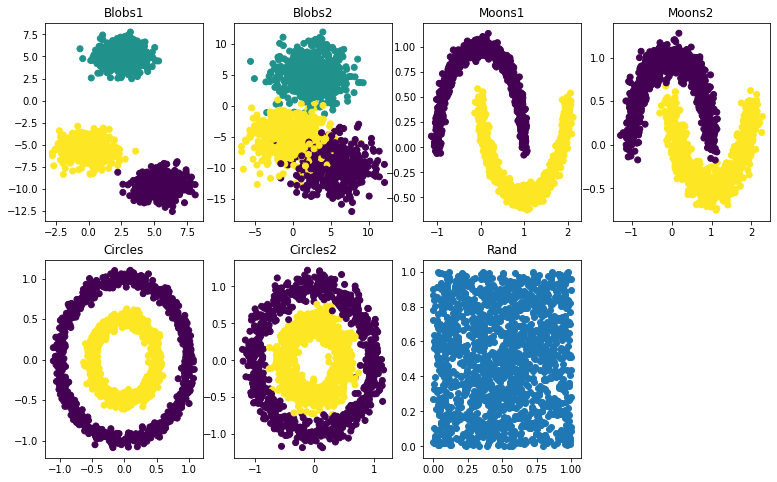

In [51]:
plt.figure(figsize=(13,8))

plt.subplot(2,4,1)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c= Blobs1_y)
plt.title('Blobs1')

plt.subplot(2,4,2)
plt.scatter(Blobs2_X[:, 0], Blobs2_X[:, 1], c= Blobs2_y)
plt.title('Blobs2')

plt.subplot(2,4,3)
plt.scatter(Moons1_X[:, 0], Moons1_X[:, 1], c= Moons1_y)
plt.title('Moons1')

plt.subplot(2,4,4)
plt.scatter(Moons2_X[:, 0], Moons2_X[:, 1], c= Moons2_y)
plt.title('Moons2')

plt.subplot(2,4,5)
plt.scatter(Circles1_X[:, 0], Circles1_X[:, 1], c= Circles1_y)
plt.title('Circles')

plt.subplot(2,4,6)
plt.scatter(Circles2_X[:, 0], Circles2_X[:, 1], c= Circles2_y)
plt.title('Circles2')

plt.subplot(2,4,7)
plt.scatter(Rand_X[:, 0], Rand_X[:, 1])
plt.title('Rand')
plt.show()

### 2. Clustering the data using K-Means, EM, Agglomerative, DBSCAN, and Spectral clustering algorithms

#### a. K-Means clustering

<span style="color:red">**Question:** </span> Discover 3 clusters in Blobs1_X data using k-Means clustering. Compute SSE score for this clustering.

Initializing the KMeans object with n_clusters = 3

In [52]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state);

Using *fit_predict()* function in KMeans object to find cluster labels for Blobs1 data.

In [53]:
y_pred = kmeans.fit_predict(Blobs1_X)

Printing *y_pred* that captures the result of k-means clustering. 

In [54]:
y_pred

array([2, 1, 1, ..., 1, 1, 1])

This is a vector whose length is the same as the number of data points. Each value indicates the cluster to which the point is assigned by k-means algorithm.

Using *score()* function in KMeans object to find SSE score for the above clustering. The '-' sign is to flip the -SSE returned by score function.

In [55]:
score = -kmeans.score(Blobs1_X)
print(score)

2875.5754608105462


<span style="color:red">**Question:** </span>Plot the data with colors based on true cluster memberships and with cluster memberships discovered using KMeans.

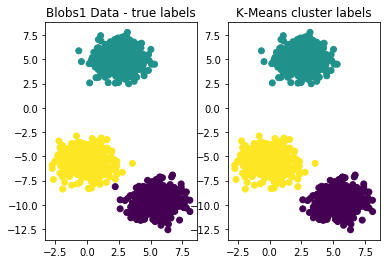

In [56]:
fig, ax = plt.subplots()
plt.subplot(1,2,1)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=Blobs1_y) # true clusters
plt.title('Blobs1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=y_pred)  # KMeans clusters
plt.title('K-Means cluster labels')
plt.show()

<span style="color:red">**Question:** </span> Is KMeans able to find the original clusters in the Blobs1 data?

<span style="color:green">**Answer:** </span>Yes, KMeans is able to find the original clusters in the Blobs1 data.

#### b. EM approach for clustering

<span style="color:red">**Question:** </span> Discover 3 clusters in Blobs1_X data using EM/Gaussian Mixture Model approach. 

Initializing the GaussianMixture object with n_clusters = 3

In [57]:
n_clusters = 3;
gmm = GaussianMixture(n_components=n_clusters, covariance_type='full')

Using *fit_predict()* function in GaussianMixture object to find cluster labels for Blobs1 data.

In [58]:
y_pred = gmm.fit_predict(Blobs1_X)

<span style="color:red">**Question:** </span>Plot the data with colors based on true cluster memberships and with cluster memberships discovered using EM approach.

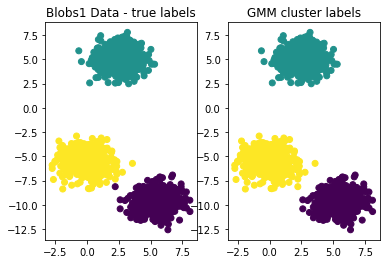

In [59]:
plt.subplot(1,2,1)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=Blobs1_y) # true clusters
plt.title('Blobs1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=y_pred)  # EM clusters
plt.title('GMM cluster labels')
plt.show()

<span style="color:red">**Question:** </span>Plot the Gaussian distribution contours for each cluster. 

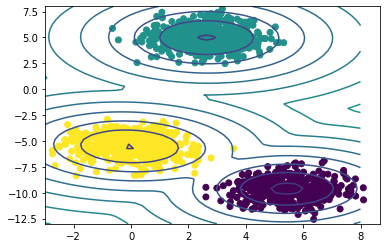

In [60]:
from matplotlib.colors import LogNorm

x = np.linspace(-3, 8) #x-axis
y = np.linspace(-13, 8) #y-axis
X, Y = np.meshgrid(x, y) #grid
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -gmm.score_samples(XX) #probability at each point
Z = Z.reshape(X.shape)

plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=y_pred)  #plot data
plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 3, 20)) #plot prob. density
plt.show()

<span style="color:red">**Question:** </span>What do the above contours represent?

<span style="color:green">**Answer:** </span>These contours depict the probability for a data point to belong to each of the clusters.

#### c. Agglomerative Clustering

<span style="color:red">**Question:** </span> Discover 3 clusters in Blobs1_X data using __single-link agglomerative clustering__. 

Initializing the Agglomerative clustering object with single-link and n_clusters = 3. Finding cluster assignments on Blobs1 dataset using *fit_predict()*.

In [61]:
n_clusters = 3
single_linkage = AgglomerativeClustering(linkage="single", n_clusters=n_clusters)
y_pred = single_linkage.fit_predict(Blobs1_X)

<span style="color:red">**Question:** </span>Plot the cluster assignments and compare with true labels.

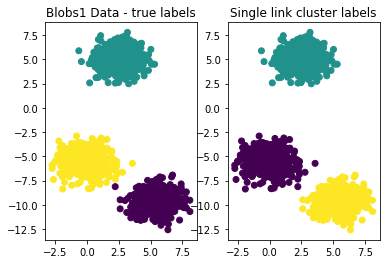

In [62]:
plt.subplot(1,2,1)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=Blobs1_y)
plt.title('Blobs1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=y_pred)
plt.title('Single link cluster labels')
plt.show()

<span style="color:red">**Question:** </span> Discover 3 clusters in Blobs1_X data using __complete-link agglomerative clustering__. 

Initializing the Agglomerative clustering object with complete-link and n_clusters = 3. Finding cluster assignments on Blobs1 dataset using *fit_predict()*.

In [63]:
n_clusters = 3
complete_linkage = AgglomerativeClustering(linkage="complete", n_clusters=n_clusters)
y_pred = complete_linkage.fit_predict(Blobs1_X)

<span style="color:red">**Question:** </span>Plot cluster assignments and compare with true labels.

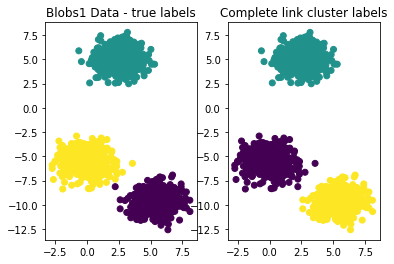

In [64]:
plt.subplot(1,2,1)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=Blobs1_y)
plt.title('Blobs1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=y_pred)
plt.title('Complete link cluster labels')
plt.show()

<span style="color:red">**Question:** </span> Discover 3 clusters in Blobs1_X data using __average-link agglomerative clustering__. 

Initializing the Agglomerative clustering object with average-link and n_clusters = 3. Finding cluster assignments  on Blobs1 dataset using *fit_predict()*.

In [65]:
n_clusters = 3
average_linkage = AgglomerativeClustering(linkage="average", n_clusters=n_clusters)
y_pred = average_linkage.fit_predict(Blobs1_X)

<span style="color:red">**Question:** </span>Plot cluster assignments and compare with true labels.

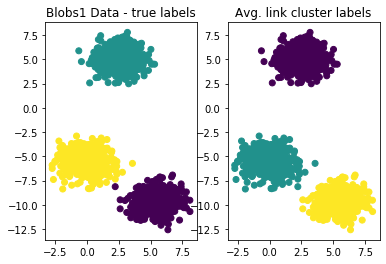

In [66]:
plt.subplot(1,2,1)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=Blobs1_y)
plt.title('Blobs1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=y_pred)
plt.title('Avg. link cluster labels')
plt.show()

#### d. DBSCAN Algorithm

<span style="color:red">**Question:** </span> Discover 3 clusters in Blobs1_X data using __DBSCAN__ approach. 

Initializing DBSCAN object with eps=1 and min_samples=10. Note that DBSCAN does not take n_clusters as input. Finding clusters on Blobs1 dataset using *fit_predict()*

In [67]:
dbscan = DBSCAN(eps=1, min_samples=10)
y_pred = dbscan.fit_predict(Blobs1_X)

<span style="color:red">**Question:** </span> How many noise points did __DBSCAN__ approach find. 

DBSCAN assigns noise points a value of '-1'

In [68]:
np.sum(y_pred==-1)
np.unique(y_pred)

array([-1,  0,  1,  2], dtype=int64)

<span style="color:red">**Question:** </span>Plot cluster assignments and compare with true labels.

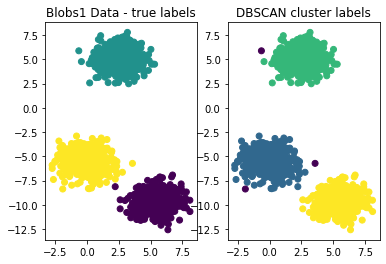

In [69]:
plt.subplot(1,2,1)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=Blobs1_y)
plt.title('Blobs1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=y_pred)
plt.title('DBSCAN cluster labels')
plt.show()

#### e. SpectralClustering Algorithm

<span style="color:red">**Question:** </span> Discover 3 clusters in Blobs1_X data using __Spectral clustering__ approach. 

Initializing SpectralClustering object with n_clusters = 3. Finding cluster assignments on Blobs1 dataset using fit_predict().

In [70]:
n_clusters = 3
spectral = SpectralClustering(n_clusters=n_clusters, random_state=random_state)
y_pred = spectral.fit_predict(Blobs1_X)

<span style="color:red">**Question:** </span>Plot cluster assignments and compare with true labels.

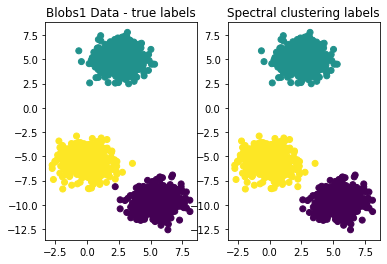

In [71]:
plt.subplot(1,2,1)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=Blobs1_y)
plt.title('Blobs1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=y_pred)
plt.title('Spectral clustering labels')
plt.show()

### 3. Kernel Density Estimation

<span style="color:red">**Question:** </span> Compute and plot kernel density using a Gaussian kernel with a bandwidth of 5.

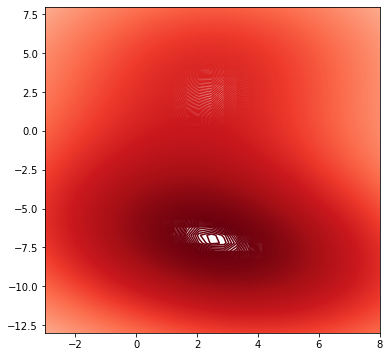

In [72]:
plt.figure(figsize=(6,6))
sns.kdeplot(Blobs1_X[:, 0], Blobs1_X[:, 1], kernel = 'guassian', bw = 5, cmap="Reds", n_levels = 1000)
plt.xlim(-3,8)
plt.ylim(-13,8)
plt.show()

### 4. Clustering Evaluation

<span style="color:red">**Question:** </span>Determine the choice of k using SSE

We first compute SSE for different values of k = {2,3,4,5,6,7}

In [73]:
score = np.zeros(8);
for i in range(2,8):
    kmeans = KMeans(n_clusters=i, random_state=random_state); #Initializing KMeans for different n_clusters
    kmeans.fit_predict(Blobs1_X)  #Clustering using KMeans
    score[i] = -kmeans.score(Blobs1_X)  #Computing SSE
    print("SSE for k=",i,":", round(score[i],2)) #Printing SSE

SSE for k= 2 : 14581.78
SSE for k= 3 : 2875.58
SSE for k= 4 : 2511.66
SSE for k= 5 : 2190.27
SSE for k= 6 : 1897.85
SSE for k= 7 : 1669.87


Plotting SSE for different values of k.

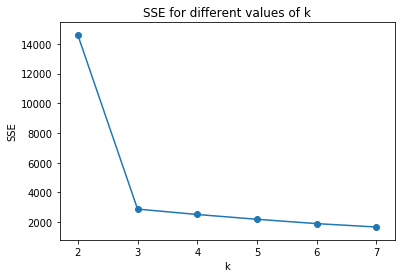

In [74]:
plt.plot(range(2,8),score[2:8])
plt.scatter(range(2,8),score[2:8])
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('SSE for different values of k')
plt.show()

<span style="color:green">**Answer:** </span> Based on this plot, we see that beyond k=3 there is no significant reduction in SSE. So we choose k=3.

#### b. Silhouette Coefficient

<span style="color:red">**Question:** </span>Compute Silhouette coefficient for each data point using the K-Means clustering with k=2 on Blobs1 data.

We first cluster Blobs1 dataset into two clusters using KMeans.

In [75]:
n_clusters = 2;
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state);
y_pred = kmeans.fit_predict(Blobs1_X)

We now compute silhouette coefficient for this clustering.

In [76]:
sample_silhouette_values = silhouette_samples(Blobs1_X, y_pred)

In [77]:
sample_silhouette_values.shape

(1500,)

<span style="color:red">**Question:** </span>Compute the mean of silhouette values of all the data points.

In [78]:
np.mean(sample_silhouette_values)

0.7226129828708546

<span style="color:red">**Question:** </span> What does this mean value indicate?

 <span style="color:green">**Answer:** </span> It is indicative of the overall quality of the clustering. As the best possible value is 1, the value of 0.722 indicates that there is good cohesion and separation between the clusters.

<span style="color:red">**Question:** </span> Can the above result give any information about the individual clusters?

<span style="color:green">**Answer:** </span>It does not inform which clusters have better silhouette values. To capture this, we have to compute silhouette values for each cluster separately.

<span style="color:red">**Question:** </span> Compute the silhoutte values of each cluster separately.

In [79]:
for i in range(0,n_clusters):
    print(np.mean(sample_silhouette_values[y_pred==i]))

0.652856790077307
0.8621253684579501


<span style="color:red">**Question:** </span> What do you observe from the above silhoutte values?

<span style="color:green">**Answer:** </span>This indicates that cluster 1 has relatively low cohesion/separation compared to cluster 2.

<span style="color:red">**Question:** </span>Write a function to plot silhouette values for points in each cluster separately.

This function takes two input arguments: datamatrix X and cluster labels 

In [80]:
def silhouette(X,labels): 
    n_clusters = np.size(np.unique(labels));
    sample_silhouette_values = silhouette_samples(X, labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        #Compute the new y_lower for next cluster
        y_lower = y_upper + 10  # 10 for the 0 samples
    plt.title("Silhouette plot for the various clusters.")
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")
    plt.show()

<span style="color:red">**Question:** </span> Use "silhouette" function to plot per-cluster silhouette values from each cluster in separate colors.

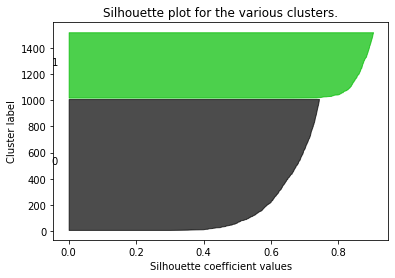

In [81]:
silhouette(Blobs1_X,y_pred)

<span style="color:red">**Question:** </span> How do you interpret this plot?

<span style="color:green">**Answer:** </span>This plots indicates that most points in 'cluster 1' exhibit very strong cohesion and separation, while points in 'cluster 2' do not. This can be explained by the following plot that shows that the bottom two sets of points are merged into 1 cluster, as we are forcing the algorithm to find only 2 clusters (n_clusters = 2) while there are 3 clusters.

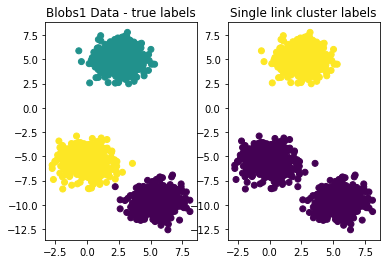

In [82]:
plt.subplot(1,2,1)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=Blobs1_y)
plt.title('Blobs1 Data - true labels')
plt.subplot(1,2,2)
plt.scatter(Blobs1_X[:, 0], Blobs1_X[:, 1], c=y_pred)
plt.title('Single link cluster labels')
plt.show()

#### c. Hopkins Statistic

Hopkins Statistic samples p 'real' data points from the data matrix and p 'random' data points in the $R^d$ space. For each of the real data points, nearest neighbor distances to other real data points $w_i$ and to random data points $u_i$ are computed.

Finally, Hopkins statistic is computed as 
$$H = \frac{\sum_{i=1}^p w_i}{\sum_{i=1}^p u_i + \sum_{i=1}^p w_i}$$

A value close to 1 indicates that there is strong cluster structure in the data.
A value close to 0 indicates that data is regularly distributed in the $R^d$ space.


<span style="color:red">**Question:** </span> Write a function hopkins(X) to compute Hopkins statistic described above. 

In [83]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

def hopkins(X):
    n = X.shape[0] #rows
    d = X.shape[1] #cols
    p = int(0.1 * n) #considering 10% of points
    nbrs = NearestNeighbors(n_neighbors=1).fit(X)
 
    rand_X = sample(range(0, n), p) 
 
    uj = []
    wj = []
    for j in range(0, p):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        uj.append(u_dist[0][1]) #distances to nearest neighbors in random data
        w_dist, _ = nbrs.kneighbors(X[rand_X[j]].reshape(1, -1), 2, return_distance=True)
        wj.append(w_dist[0][1]) #distances to nearest neighbors in real data
 
    H = sum(uj) / (sum(uj) + sum(wj))
    if isnan(H):
        print(uj, wj)
        H = 0
 
    return H

This function takes only the dataset X as input.

<span style="color:red">**Question:** </span> Using the same function determine the clustering tendency in Blobs1 dataset.

In [84]:
hopkins(Blobs1_X)

0.9280975244686458

<span style="color:red">**Question:** </span> What does the above value say about the clustering tendency?

<span style="color:green">**Answer:** </span> Because the value is close to 1, we conclude that the Blobs1 dataset has good clustering tendency.

#### d. Rand index

Rand index measures the similarity between two clusterings.

For two clusterings S and T, we first compute the following:

- $f_{11}$ is the number of pairs of elements that are in the same cluster in S and in the same cluster in T. 
- $f_{00}$ is the number of pairs of elements that are in different clusters in S and in different clusters in T.
- $f_{01}$ is the number of pairs of elements that are in different clusters in S but in same cluster in T.
- $f_{10}$ is the number of pairs of elements that are in same cluster in S but in different clusters in T.

Rand index is computed as 
$$\text{Rand Index} = \frac{f_{00}+f_{11}}{f_{00}+f_{01}+f_{10}+f_{11}} $$

A value of 1 indicates that the two clusterings S and T are identical. 


<span style="color:red">**Question:** </span> Write a function rand_index(S,T) to compare two clusterings S and T.

In [85]:
from scipy.special import comb
def rand_index(S, T):

    Spairs = comb(np.bincount(S), 2).sum()
    Tpairs = comb(np.bincount(T), 2).sum()
    
    A = np.c_[(S, T)]
    
    f_11 = sum(comb(np.bincount(A[A[:, 0] == i, 1]), 2).sum()
             for i in set(S))
    
    f_10 = Spairs - f_11
    f_01 = Tpairs - f_11
    f_00 = comb(len(A), 2) - f_11 - f_10 - f_01
    return (f_00 + f_11) / (f_00 + f_01 + f_10 + f_11)

<span style="color:red">**Question:** </span> First compute K-Means clustering and Avg. link clustering on Blobs1 dataset using n_clusters = 2. Then compute the rand index between the two.

In [86]:
n_clusters = 2;
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state);
y_pred_kmeans = kmeans.fit_predict(Blobs1_X)

average_linkage = AgglomerativeClustering(linkage="average", n_clusters=n_clusters)
y_pred_avg = average_linkage.fit_predict(Blobs1_X)

In [87]:
print(rand_index(y_pred_kmeans, y_pred_avg))

1.0


<span style="color:red">**Question:** </span> What does this rand_index value of 1.0 indicate?

<span style="color:green">**Answer:** </span> As the value of rand index is 1, we can say that the above clusterings from K-Means and Avg. link are identical.

<span style="color:red">**Question:** </span> Also, use this metric to determine how similar the cluster assigments are to the ground truth.

In [88]:
print(rand_index(y_pred_kmeans, Blobs1_y))
print(rand_index(y_pred_avg, Blobs1_y))


0.77762953079831
0.77762953079831


<span style="color:red">**Question:** </span> What do the above values indicate

<span style="color:green">**Answer:** </span> As the values are ~0.77, we can say that the clusterings are similar to the ground truth to an extent, but not entirely similar to it. 